In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

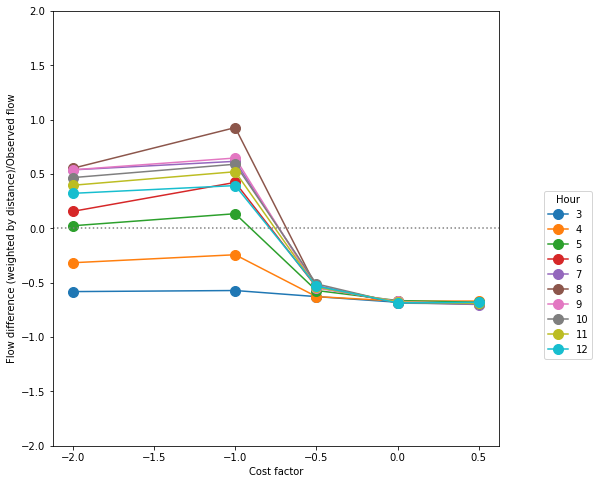

In [10]:
test = pd.read_csv('parameter_sensitivity.csv')

fig, ax = plt.subplots(figsize=(8,8))
# color_dict=[3:'r', 6:'b']
for nm, grp in test.groupby('hour'):
    l = ax.plot(grp['costfct'], grp['Q_wdiff_med']/grp['Q_obs_med'], label=nm, marker='.', ms=20)
    # ax.plot(grp['costfct'], grp['Q_wdiff_25']/grp['Q_obs_med'], marker='.', ms=5, ls=':', c=l[0].get_color())
    # ax.plot(grp['costfct'], grp['Q_wdiff_75']/grp['Q_obs_med'], marker='.', ms=5, ls=':', c=l[0].get_color())
    # print(grp['hwy_discnt'], grp['Q_wdiff_mean']/grp['Q_obs_mean'])
ax.axhline(0, color='gray', ls=':')
plt.xlabel('Cost factor')
plt.ylabel('Flow difference (weighted by distance)/Observed flow')
# plt.yscale('log')
# plt.xlim([1.6, 2.1])
plt.ylim([-2, 2])
plt.legend(title='Hour', loc=[1.1, 0.2])
plt.show()

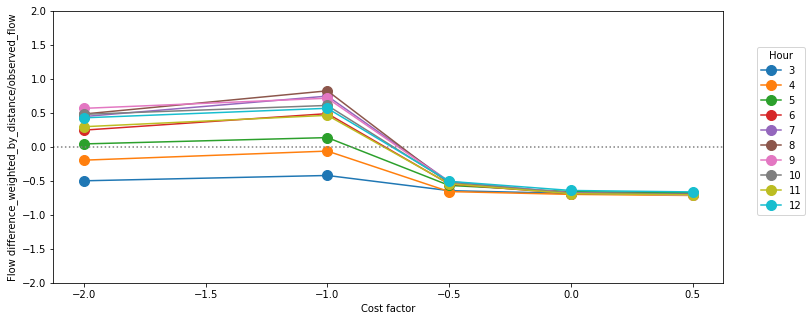

In [82]:
test = pd.read_csv('parameter_sensitivity_hourly.csv')

fig, ax = plt.subplots(figsize=(12,5))
# color_dict=[3:'r', 6:'b']
for nm, grp in test.groupby('hour'):
    l = ax.plot(grp['costfct'], grp['Q_wdiff_med']/grp['Q_obs_med'], label=nm, marker='.', ms=20)
    # ax.plot(grp['costfct'], grp['Q_wdiff_25']/grp['Q_obs_med'], marker='.', ms=5, ls=':', c=l[0].get_color())
    # ax.plot(grp['costfct'], grp['Q_wdiff_75']/grp['Q_obs_med'], marker='.', ms=5, ls=':', c=l[0].get_color())
    # print(grp['hwy_discnt'], grp['Q_wdiff_mean']/grp['Q_obs_mean'])
ax.axhline(0, color='gray', ls=':')
plt.xlabel('Cost factor')
plt.ylabel('Flow difference_weighted_by_distance/observed_flow')
# plt.yscale('log')
# plt.xlim([1.6, 2.1])
plt.ylim([-2, 2])
plt.legend(title='Hour', loc=[1.05, 0.25])
plt.show()

In [14]:
quarterly_measures = pd.read_csv('quarterly_measure.csv')
print(quarterly_measures.head())

obs_grp_id  dir  start_quarter       start         end     Q
0           0    1              0  2579845617  2579787363  74.2
1           0    1              1  2579845617  2579787363  72.5
2           0    1              2  2579845617  2579787363  69.3
3           0    1              3  2579845617  2579787363  70.3
4           0    1              4  2579845617  2579787363  65.7


In [13]:
demand_files = ["/projects/tokyo_residential_above/demand_inputs/od_residual_demand_0.csv",
                    "/projects/tokyo_residential_above/demand_inputs/od_residual_demand_1.csv",
                    "/projects/tokyo_residential_above/demand_inputs/od_residual_demand_2.csv"]
od_list = []
for demand_file in demand_files:
    od_chunk = pd.read_csv( '../../..' + demand_file )
    od_list.append(od_chunk)

od_all = pd.concat(od_list, ignore_index=True)
od_all = od_all[['agent_id', 'node_id_igraph_O', 'node_id_igraph_D', 'hour']]

hour  hourly_trip_cnts
2      5            900349
3      6           2153867
13    16           2018986
15    18            981087
    hour           Q
2      5  444.153381
3      6  697.960854
13    16  768.959075
15    18  686.444128
    hour      Q
2      5  404.9
3      6  653.6
13    16  762.3
15    18  653.2


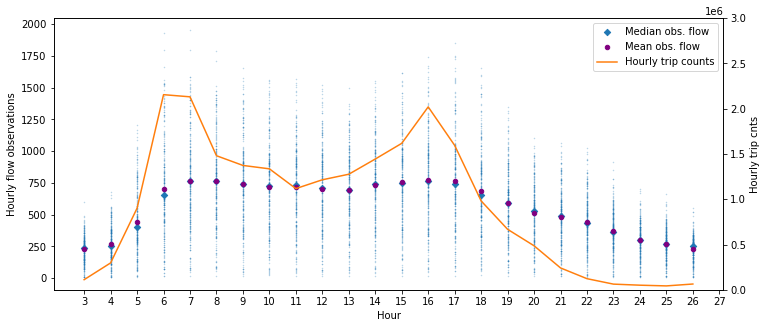

In [69]:
hourly_trips = od_all.groupby('hour').size().to_frame('hourly_trip_cnts').reset_index()
hourly_hwyQ = quarterly_measures.copy()
hourly_hwyQ['hour'] = hourly_hwyQ['start_quarter']//4 # + hourly_hwyQ['start_quarter']%4*0.25
hourly_hwyQ['hour'] = np.where(hourly_hwyQ['hour']<3, hourly_hwyQ['hour']+24, hourly_hwyQ['hour'])
hourly_hwyQ = hourly_hwyQ.groupby(['obs_grp_id', 'hour']).agg({'Q': np.sum}).reset_index()
hourly_hwyQ_med = hourly_hwyQ.groupby('hour').agg({'Q': np.median}).reset_index()
hourly_hwyQ_mean = hourly_hwyQ.groupby('hour').agg({'Q': np.mean}).reset_index()

fig, ax1 = plt.subplots(figsize=(12,5))
ax2 = ax1.twinx()
ax1.scatter(hourly_hwyQ['hour'], hourly_hwyQ['Q'], s=1, marker='.', alpha=0.3)
l1 = ax1.scatter(hourly_hwyQ_med['hour'], hourly_hwyQ_med['Q'], s=20, marker='D', c=u'#1f77b4', label='Median obs. flow')
l2 = ax1.scatter(hourly_hwyQ_mean['hour'], hourly_hwyQ_mean['Q'], s=20, marker='o', c='purple', label='Mean obs. flow')
l3 = ax2.plot(hourly_trips['hour'], hourly_trips['hourly_trip_cnts'], c=u'#ff7f0e', label='Hourly trip counts')
# for hour, grp in hourly_hwyQ.groupby('hour'):
#     ax1.boxplot(grp['Q'], positions=[hour], showcaps=False, showbox=False, showfliers=False)

print(hourly_trips[hourly_trips['hour'].isin([5,6,16,18])])
print(hourly_hwyQ_mean[hourly_hwyQ_mean['hour'].isin([5,6,16,18])])
print(hourly_hwyQ_med[hourly_hwyQ_med['hour'].isin([5,6,16,18])])

# added these three lines
lns = [l1, l2] + l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)

ax1.xaxis.set_ticks(np.arange(3, 28, 1))
ax2.set_ylim([0, 3000000])
ax1.set_xlabel('Hour')
ax1.set_ylabel('Hourly flow observations')
ax2.set_ylabel('Hourly trip cnts')
plt.show()

In [2]:
### add geometry
links_df = pd.read_csv('../network_inputs/edges_residual_demand.csv')
edge_vol = pd.read_csv('../simulation_outputs/edge_vol/edge_vol_hr5_qt3_costfct0.csv')
edge_vol = edge_vol.merge(links_df[['start_igraph', 'end_igraph', 'geometry']], how='left', on=['start_igraph', 'end_igraph'])
edge_vol[edge_vol['vol_true']>10].to_csv('../visualization_outputs/edge_vol_hr5_qt3_costfct0.csv', index=False)

In [83]:
links_df.groupby('type').agg({'maxmph': [np.mean, np.median, np.std]})

maxmph                     
                     mean     median       std
type                                          
motorway        55.907743  62.137274  9.463057
motorway_link   36.507928  37.282364  3.833314
primary         34.001188  37.282364  5.448290
primary_link    36.438292  37.282364  3.028861
residential     37.047284  37.282364  2.170194
secondary       34.264756  37.282364  5.676055
secondary_link  36.469598  37.282364  3.657617
tertiary        34.377958  37.282364  6.172279
tertiary_link   36.804021  37.282364  2.877913
trunk           35.307140  37.282364  3.959247
trunk_link      36.043030  37.282364  4.069166

In [6]:
### compare CH and SP
links_df = pd.read_csv('../network_inputs/edges_residual_demand.csv')[['start_igraph', 'end_igraph', 'geometry']]
links_df['edge_str'] = links_df['start_igraph'].astype('str') + '-' + links_df['end_igraph'].astype('str')
links_df = links_df.set_index('edge_str')[['geometry']]

edge_vol_sp = pd.read_csv('../simulation_outputs/edge_vol/edge_vol_hr3_qt3_sp.csv')
edge_vol_sp['edge_str'] = edge_vol_sp['start_igraph'].astype('str') + '-' + edge_vol_sp['end_igraph'].astype('str')
edge_vol_sp = edge_vol_sp.set_index('edge_str')

edge_vol_ch = pd.read_csv('../simulation_outputs/edge_vol/edge_vol_hr3_qt3_ch.csv')
edge_vol_ch['edge_str'] = edge_vol_ch['start_igraph'].astype('str') + '-' + edge_vol_ch['end_igraph'].astype('str')
edge_vol_ch = edge_vol_ch.set_index('edge_str')

links_df = links_df.join(edge_vol_sp, how='left').join(edge_vol_ch, how='left', lsuffix='_sp', rsuffix='_ch')
links_df.head()

,geometry,start_igraph_sp,end_igraph_sp,vol_true_sp,flow_sp,t_avg_sp,start_igraph_ch,end_igraph_ch,vol_true_ch,flow_ch,t_avg_ch
edge_str,,,,,,,,,,,
0-196993,"LINESTRING (139.5294305 35.7777365,139.5293539...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-12,"LINESTRING (139.7110211 36.2867956,139.7117399...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-159576,"LINESTRING (139.7074957 36.2801937,139.7077185...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-94295,"LINESTRING (139.7074957 36.2801937,139.7074607...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100-408759,"LINESTRING (139.4311718 35.5721795,139.4308694...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
links_df['vol_true_diff'] = links_df['vol_true_sp'] - links_df['vol_true_ch']
diff_df = links_df[~np.isnan(links_df['vol_true_diff'])]
display(diff_df[diff_df['vol_true_diff'] != 0])
print(diff_df.shape, diff_df[diff_df['vol_true_sp']!=0].shape, diff_df[diff_df['vol_true_ch']!=0].shape, diff_df[diff_df['vol_true_diff']!=0].shape)
diff_df[['vol_true_sp', 'vol_true_ch', 'vol_true_diff']].describe()

,geometry,start_igraph_sp,end_igraph_sp,vol_true_sp,flow_sp,t_avg_sp,start_igraph_ch,end_igraph_ch,vol_true_ch,flow_ch,t_avg_ch,vol_true_diff
edge_str,,,,,,,,,,,,
106228-468579,"LINESTRING (139.4706582 35.8166078,139.4716033...",106228.0,468579.0,2.0,8.0,17.75,106228.0,468579.0,1.0,4.0,17.75,1.0
106230-106229,"LINESTRING (139.4703263 35.8166363,139.470622 ...",106230.0,106229.0,2.0,8.0,2.32,106230.0,106229.0,1.0,4.0,2.32,1.0
106232-106230,"LINESTRING (139.4696629 35.8166932,139.4703263...",106232.0,106230.0,2.0,8.0,5.20,106232.0,106230.0,1.0,4.0,5.20,1.0
113967-300386,"LINESTRING (139.7124808 36.0369832,139.7127839...",113967.0,300386.0,1.0,4.0,3.03,113967.0,300386.0,5.0,20.0,3.03,-4.0
120769-153810,"LINESTRING (139.5907574 35.4650902,139.5913887...",120769.0,153810.0,10.0,40.0,9.84,120769.0,153810.0,9.0,36.0,9.84,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
83675-387592,"LINESTRING (139.4137736 35.3481126,139.4141662...",83675.0,387592.0,1.0,4.0,15.85,83675.0,387592.0,2.0,8.0,15.85,-1.0
83693-83700,"LINESTRING (139.4189031 35.3485411,139.4186129...",83693.0,83700.0,3.0,12.0,7.13,83693.0,83700.0,2.0,8.0,7.13,1.0
83700-356535,"LINESTRING (139.4180661 35.3488332,139.4177178...",83700.0,356535.0,3.0,12.0,2.98,83700.0,356535.0,2.0,8.0,2.98,1.0


(224823, 12) (224823, 12) (224823, 12) (191, 12)


,vol_true_sp,vol_true_ch,vol_true_diff
count,224823.000000,224823.000000,224823.000000
mean,2.042242,2.042611,-0.000369
std,2.397440,2.397244,0.072538
min,1.000000,1.000000,-7.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000
max,51.000000,51.000000,7.000000
